# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import auc, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("./Dataset/Week 4/application_train.csv")
print(df_train.shape)
df_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_test = pd.read_csv("./Dataset/Week 4/application_test.csv")
print(df_test.shape)
df_test.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Explore Data

In [4]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
df_train.SK_ID_CURR.nunique()

307511

In [6]:
df_test.SK_ID_CURR.nunique()

48744

In [7]:
print(df_train.shape)
print(df_test.shape)

(307511, 122)
(48744, 121)


### Visualizations

Text(0.5, 1.0, 'Target features')

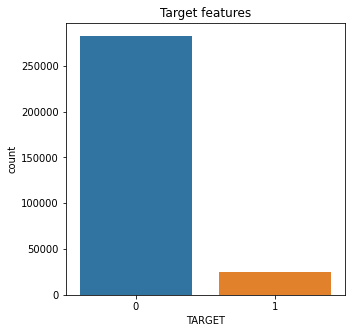

In [8]:
#Distribution in target feature

plt.figure(figsize=(5,5))

sns.countplot(x='TARGET', data=df_train)
plt.title('Target features')

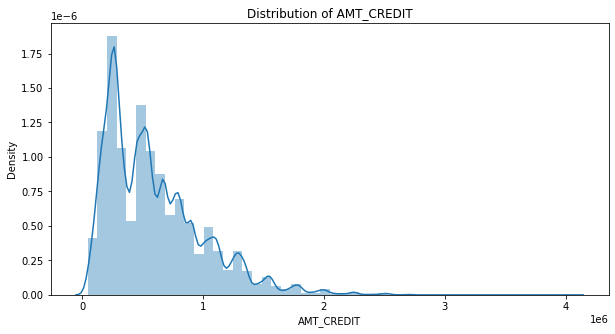

In [9]:
plt.figure(figsize=(10,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(df_train["AMT_CREDIT"])

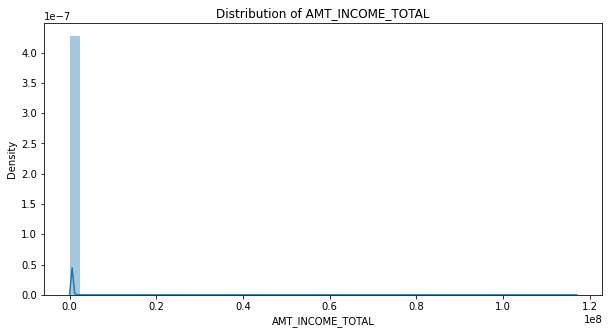

In [10]:
plt.figure(figsize=(10,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(df_train["AMT_INCOME_TOTAL"].dropna())

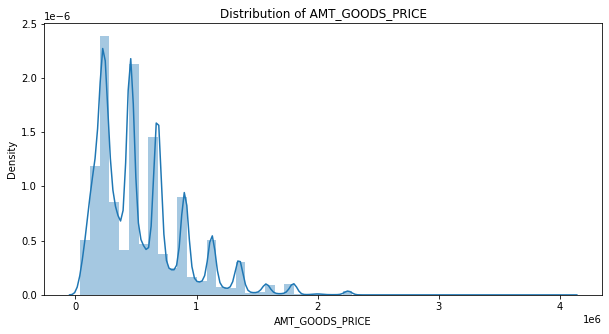

In [11]:
plt.figure(figsize=(10,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(df_train["AMT_GOODS_PRICE"].dropna())

### Missing Values

In [12]:
miss_val = df_train.isnull().sum()
print("Total missing values:", miss_val.sum())

Total missing values: 9152465


In [13]:
train = df_train.loc[:,miss_val.index[miss_val<10000]]
print("Data train shape:",train.shape)

test = df_test.loc[:,(miss_val.index[miss_val<10000]).drop('TARGET')]
print("Data test shape:",test.shape)

Data train shape: (307511, 65)
Data test shape: (48744, 64)


In [14]:
miss_val_test = test.isnull().sum()
print("Total number of missing values:",miss_val_test.sum())

Total number of missing values: 1059


In [15]:
test_id = test['SK_ID_CURR']
test_id

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length: 48744, dtype: int64

### Split data

In [16]:
y_train = train.TARGET
x_train = train.drop(['TARGET'],axis=1)
print("Shape of y train:",y_train.shape)
print("Shape of x train:",x_train.shape)

Shape of y train: (307511,)
Shape of x train: (307511, 64)


In [17]:
fdata = pd.concat([x_train,test])
wdata = pd.concat([x_train,test])
wdata.shape

(356255, 64)

In [18]:
col_obj = wdata.columns[wdata.dtypes == 'object']
for i in col_obj:
    wdata.loc[:,i],_ = pd.factorize(wdata.loc[:,i])
wdata.head(3) 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,100004,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data = wdata.fillna(0)

data = data.drop(['SK_ID_CURR'],axis=1)
xtrain = data.iloc[0:len(x_train),:]
xtest = data.iloc[len(x_train):len(data),:] 
print(xtrain.shape)
print(xtest.shape)

(307511, 63)
(48744, 63)


### Scale Data

In [20]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(xtrain)
x_scaled = scaler.transform(xtrain)
x_scaled = pd.DataFrame(x_scaled)
x_scaled.isna().sum().sum()

0

## Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_scaled, y_train, test_size=0.2, random_state=18)

from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(max_iter=100, solver='lbfgs', penalty='l2', C=10)
lreg.fit(X_train, Y_train)

LogisticRegression(C=10)

In [22]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV

# # Logistic Regression Hyperparameter Tuning

# # define parameters
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]

# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=lreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, Y_train)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [23]:
y_pred = lreg.predict_proba(X_val)
print("Validation ROC AUC:",roc_auc_score(Y_val, y_pred[:,1]))

Validation ROC AUC: 0.7007499769555399


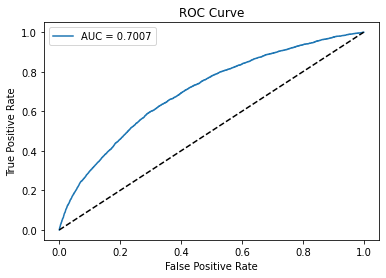

In [24]:
fpr, tpr, tr = roc_curve(Y_val, y_pred[:,1])
auc = roc_auc_score(Y_val, y_pred[:,1])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_features='sqrt')
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [26]:
# # Random Forest Hyperparameter Tuning

# # define parameters
# n_estimators = [10, 100, 1000]
# max_features = ['sqrt', 'log2']

# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, Y_train)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [27]:
y_pred = RF.predict_proba(X_val)
print("Validation ROC AUC:",roc_auc_score(Y_val, y_pred[:,1]))

Validation ROC AUC: 0.6763926451636325


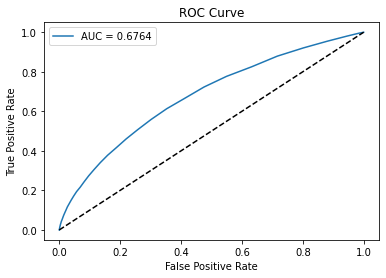

In [28]:
fpr, tpr, tr = roc_curve(Y_val, y_pred[:,1])
auc = roc_auc_score(Y_val, y_pred[:,1])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

## Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

svm = SVC(max_iter=100, kernel='rbf', C=10, gamma='scale')
clf = CalibratedClassifierCV(svm)
clf.fit(X_train, Y_train)

CalibratedClassifierCV(base_estimator=SVC(C=10, max_iter=100))

In [30]:
# # Support Vector Machine Hyperparameter Tuning

# # define parameters
# kernel = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gamma = ['scale']

# # define grid search
# grid = dict(kernel=kernel,C=C,gamma=gamma)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, Y_train)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [31]:
y_pred = clf.predict_proba(X_val)
print("Validation ROC AUC:",roc_auc_score(Y_val, y_pred[:,1]))

Validation ROC AUC: 0.5444655474132954


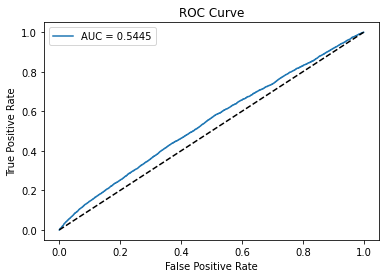

In [32]:
fpr, tpr, tr = roc_curve(Y_val, y_pred[:,1])
auc = roc_auc_score(Y_val, y_pred[:,1])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Model klasifikasi terbaik adalah model Logistic Regression dengan nilai AUC: 0.70

## Submission Result

In [33]:
lreg.fit(X_train, Y_train)
y_pred = lreg.predict(X_val)
y_pred_test = lreg.predict(X_val)

In [40]:
result = pd.DataFrame({'SK_ID_CURR': wdata.SK_ID_CURR, 'TARGET': lreg.predict_proba(data)[:,1]})
print(result.shape)
result.head()

(356255, 2)


,SK_ID_CURR,TARGET
0,100002,1.0
1,100003,1.0
2,100004,0.0
3,100006,0.0
4,100007,0.0
